In [107]:
import sys
import os
module_path = os.path.abspath(os.path.join('../../../../../src'))
if module_path not in sys.path:
    sys.path.append(module_path)

%config InlineBackend.figure_format = 'retina'

In [108]:
from computations.insights.opinions import varying_parameters
from plotting.basic import *
from plotting.summaries import *
from matplotlib import pyplot as plt
from computations.probabilistic.vectorised import *
from society.structure.network import ArtificialNetwork
from society.beliefs import Distribution, BeliefDistribution

In [131]:
linespace = Distribution(type="linespace", range=(-1,1))
unique = Distribution(type="unique", value=0.2)
belief_distribution = BeliefDistribution(unique, linespace)
network = ArtificialNetwork(1000, "random_graph", p=0.1)
agent_network = AgentNetwork(belief_distribution, network, agent_type=AnalyticalAgent)
agent_network.set_extreme_agents(0.01, 70, 70)

In [132]:
update_rule = UpdateRule(evaluation_bias=0.3, assimilation_bias=0, rewire_probability=1)
interactions = Interactions(update_rule, interaction_rate=0.5, interacting_agents=True)
insights = Insights(["polarisation"])
simulation = Simulation(10000, insights)

In [133]:
simulation.run(interactions, agent_network)

Progress: 100%|██████████| 10000/10000 [01:49<00:00, 91.52it/s]


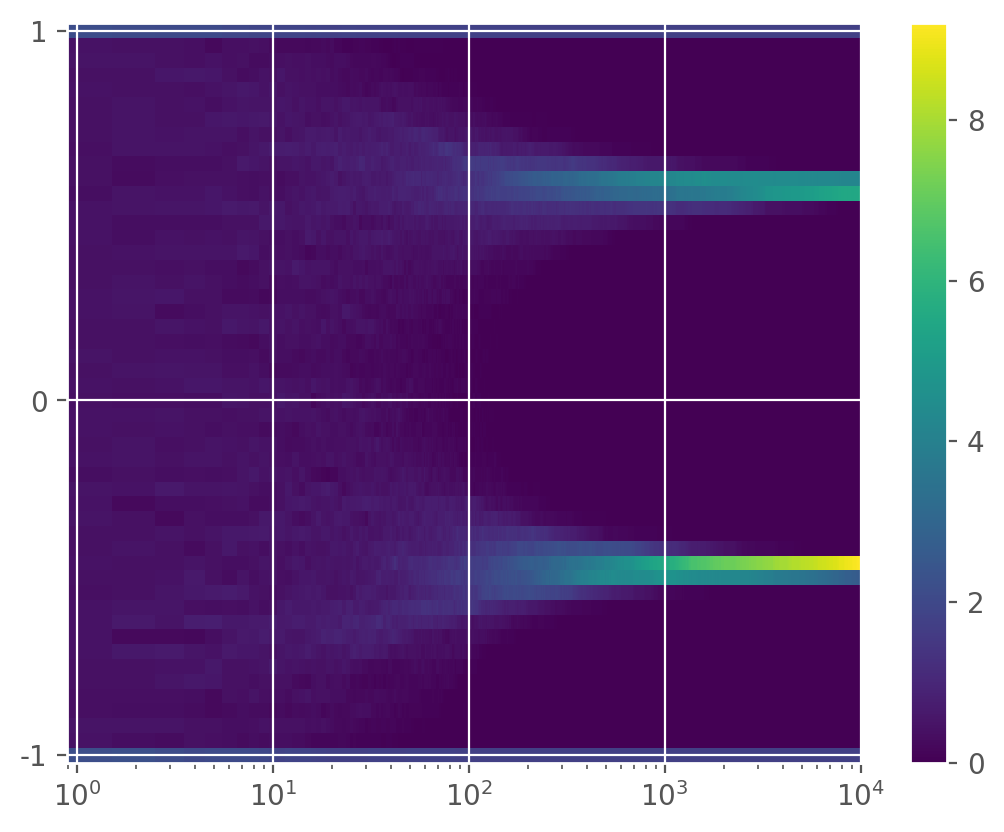

In [129]:
plot_density_of_opinions(simulation.insights.belief_evolution)

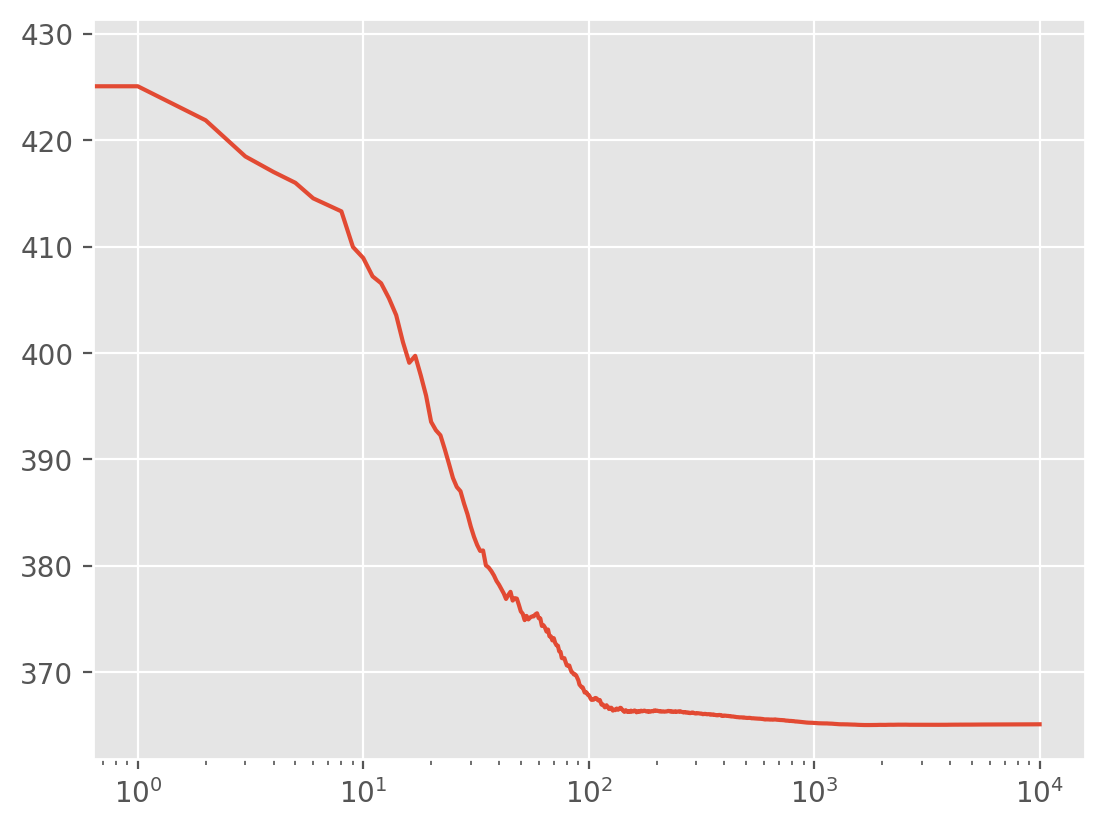

In [130]:
plt.xscale('log')
plt.plot(simulation.insights.polarisation_evolution[1:])